# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import Birch
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Data Extraction

In [2]:
# CIC IDS Dataset

file_names = [
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv'
]

In [3]:
 # Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file, read it into a DataFrame, and append to the list
for file in file_names:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)

In [4]:
# Shape of dataset
concatenated_df.shape

(2830743, 79)

In [5]:
# Dataset Overview
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

# Data Cleaning

In [6]:
# Removal of leading and trailing whitespaces from column headings
# Replacement of spaces between words in column headings with underscore(s)
concatenated_df.columns = [column.strip().replace(' ', '_') for column in list(concatenated_df.columns)]

# Dataset columns
concatenated_df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [7]:
# Check if there are any null values in the entire dataset
if concatenated_df.isnull().values.any():
    print("DataFrame contains null values.")
    # Identify columns with null values
    for col in concatenated_df.columns:
        if concatenated_df[col].isnull().any():
            print(col, concatenated_df[col].isnull().sum())
else:
    print("DataFrame does not contain null values.")

DataFrame contains null values.
Flow_Bytes/s 1358


In [8]:
# Extract only numeric columns
numeric_columns = concatenated_df.select_dtypes(include=np.number).columns

# Check for infinity values in the numeric columns
if np.isinf(concatenated_df[numeric_columns]).values.any():
    print("Dataset contains infinity values.")
    # Identify columns with infinity values
    for col in numeric_columns:
        if np.isinf(concatenated_df[col]).values.any():
            print(col, np.isinf(concatenated_df[col]).values.sum())
else:
    print("Dataset does not contain infinity values.")

Dataset contains infinity values.
Flow_Bytes/s 1509
Flow_Packets/s 2867


In [9]:
# Replace Infinity values with NaN
concatenated_df.replace([np.inf, -np.inf], np.nan, inplace=True)
print('Count of Null Values:', concatenated_df.isna().sum().sum())

# Drop all null values
concatenated_df.dropna(inplace=True)

Count of Null Values: 5734


In [10]:
# Get columns with only one unique value
single_valued_columns = []

for col in concatenated_df.columns:
    if concatenated_df[col].nunique() == 1:
        single_valued_columns.append(col)
        print(col, concatenated_df[col].nunique())

print('\n')
print('There are ', str(len(single_valued_columns)), 'single-valued columns: ')
print(single_valued_columns)

# Remove single-valued columns
concatenated_df.drop(labels=single_valued_columns, axis=1,  inplace=True)

Bwd_PSH_Flags 1
Bwd_URG_Flags 1
Fwd_Avg_Bytes/Bulk 1
Fwd_Avg_Packets/Bulk 1
Fwd_Avg_Bulk_Rate 1
Bwd_Avg_Bytes/Bulk 1
Bwd_Avg_Packets/Bulk 1
Bwd_Avg_Bulk_Rate 1


There are  8 single-valued columns: 
['Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Avg_Bytes/Bulk', 'Fwd_Avg_Packets/Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk', 'Bwd_Avg_Bulk_Rate']


In [11]:
# Calculate the count of each unique label
label_counts = concatenated_df['Label'].value_counts()
print(label_counts, '\n')

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64 



In [12]:
# Create an empty DataFrame to store the random samples of labels
final_df = pd.DataFrame()
np.random.seed(21)

# Iterate through each selected label and append a random sample to the new DataFrame
for label in concatenated_df['Label'].unique():
    label_data = concatenated_df[concatenated_df['Label'] == label]

    # Calculate the desired sample size (one-fifth of the label count)
    sample_size = int(len(label_data) / 5)

    # Use sample function to get a random sample of the specified size
    label_sample = label_data.sample(sample_size, random_state=21)

    # Append the label_sample to the final_df
    final_df = final_df.append(label_sample)

# Exploratory Data Analysis

In [13]:
# Get first five rows of DataFrame
final_df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
1734278,53,1023875,4,2,176,214,44,44,44.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2017659,53,1604632,6,6,234,478,49,34,39.0,7.745967,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1285737,53,161,2,2,90,122,45,45,45.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1001881,53,30686,1,1,51,111,51,51,51.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
193456,38659,3986,2,0,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
# Get number of rows and columns
final_df.shape

(565570, 71)

In [15]:
# Show the names and datatypes of columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565570 entries, 1734278 to 2735215
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination_Port             565570 non-null  int64  
 1   Flow_Duration                565570 non-null  int64  
 2   Total_Fwd_Packets            565570 non-null  int64  
 3   Total_Backward_Packets       565570 non-null  int64  
 4   Total_Length_of_Fwd_Packets  565570 non-null  int64  
 5   Total_Length_of_Bwd_Packets  565570 non-null  int64  
 6   Fwd_Packet_Length_Max        565570 non-null  int64  
 7   Fwd_Packet_Length_Min        565570 non-null  int64  
 8   Fwd_Packet_Length_Mean       565570 non-null  float64
 9   Fwd_Packet_Length_Std        565570 non-null  float64
 10  Bwd_Packet_Length_Max        565570 non-null  int64  
 11  Bwd_Packet_Length_Min        565570 non-null  int64  
 12  Bwd_Packet_Length_Mean       565570 non-null  float

In [16]:
# Shows the percentiles of numerical data (datatype - float & int)
final_df.describe()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,565570.000000,5.655700e+05,565570.000000,565570.000000,5.655700e+05,5.655700e+05,565570.000000,565570.000000,565570.000000,565570.000000,...,565570.000000,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05,5.655700e+05
mean,8071.203902,1.477629e+07,9.170122,10.179527,5.405700e+02,1.598641e+04,207.127157,18.826886,58.222678,68.735222,...,5.196579,-2.613995e+03,8.259727e+04,4.126475e+04,1.543264e+05,5.916753e+04,8.334136e+06,5.006319e+05,8.711484e+06,7.940998e+06
std,18282.511615,3.362545e+07,676.436899,893.334053,6.030601e+03,2.129550e+06,713.233677,61.649233,185.743943,279.580017,...,552.605399,1.039933e+06,6.808919e+05,4.099597e+05,1.065484e+06,6.090515e+05,2.367075e+07,4.582310e+06,2.440056e+07,2.340622e+07
min,0.000000,-4.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.560000e+02,2.000000,1.000000,1.200000e+01,4.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.136700e+04,2.000000,2.000000,6.200000e+01,1.240000e+02,37.000000,2.000000,34.000000,0.000000,...,1.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,3.230930e+06,5.000000,4.000000,1.880000e+02,4.840000e+02,82.000000,36.000000,50.000000,26.162951,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.000000,1.200000e+08,198590.000000,266796.000000,2.428415e+06,6.270000e+08,24820.000000,2325.000000,5560.297297,5796.500690,...,189268.000000,1.260000e+02,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.480000e+07,1.200000e+08,1.200000e+08


In [17]:
# Show the number of unique values for each column
for col in final_df.columns:
        print(col, final_df[col].nunique())

Destination_Port 33388
Flow_Duration 257339
Total_Fwd_Packets 686
Total_Backward_Packets 866
Total_Length_of_Fwd_Packets 9122
Total_Length_of_Bwd_Packets 24007
Fwd_Packet_Length_Max 3650
Fwd_Packet_Length_Min 243
Fwd_Packet_Length_Mean 35181
Fwd_Packet_Length_Std 66061
Bwd_Packet_Length_Max 3889
Bwd_Packet_Length_Min 444
Bwd_Packet_Length_Mean 45625
Bwd_Packet_Length_Std 62759
Flow_Bytes/s 348505
Flow_Packets/s 289263
Flow_IAT_Mean 274891
Flow_IAT_Std 229780
Flow_IAT_Max 168027
Flow_IAT_Min 46400
Fwd_IAT_Total 119556
Fwd_IAT_Mean 164358
Fwd_IAT_Std 148616
Fwd_IAT_Max 114404
Fwd_IAT_Min 35078
Bwd_IAT_Total 104826
Bwd_IAT_Mean 148345
Bwd_IAT_Std 143334
Bwd_IAT_Max 101595
Bwd_IAT_Min 17917
Fwd_PSH_Flags 2
Fwd_URG_Flags 2
Fwd_Header_Length 1753
Bwd_Header_Length 1939
Fwd_Packets/s 286646
Bwd_Packets/s 259908
Min_Packet_Length 175
Max_Packet_Length 4461
Packet_Length_Mean 65317
Packet_Length_Std 105156
Packet_Length_Variance 103619
FIN_Flag_Count 2
SYN_Flag_Count 2
RST_Flag_Count 2
PSH_Flag

In [18]:
# Get the count of each unique label
label_counts = final_df['Label'].value_counts()
print('Count of Labels:', '\n')
print(final_df['Label'].value_counts())

Count of Labels: 

BENIGN                        454264
DoS Hulk                       46024
PortScan                       31760
DDoS                           25605
DoS GoldenEye                   2058
FTP-Patator                     1587
SSH-Patator                     1179
DoS slowloris                   1159
DoS Slowhttptest                1099
Bot                              391
Web Attack � Brute Force         301
Web Attack � XSS                 130
Infiltration                       7
Web Attack � Sql Injection         4
Heartbleed                         2
Name: Label, dtype: int64


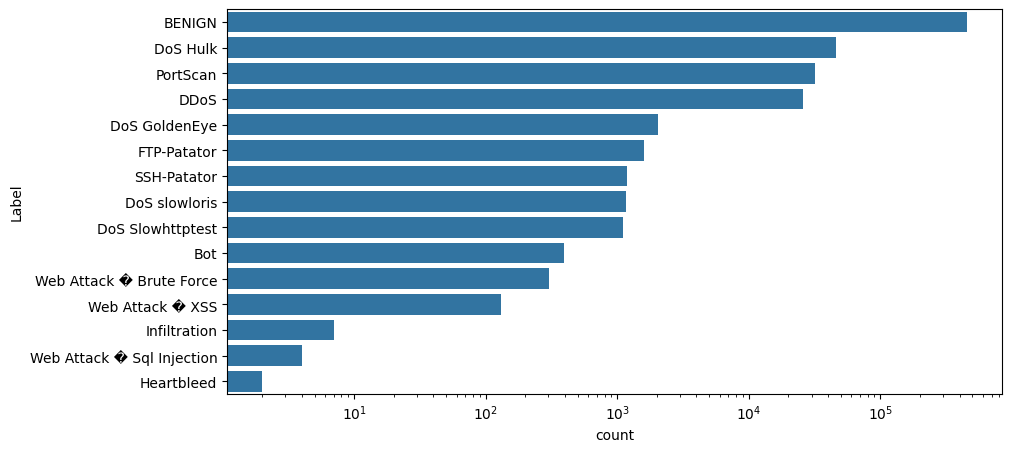

In [19]:
# Show Classification Labels
plt.figure(figsize=(10, 5))
sns.countplot(data=final_df, y='Label', order=label_counts.index)

# Set x-axis scale to logarithmic and specify the base as 10
plt.xscale('log', base=10)

plt.show()

# Feature Engineering

### Data Transformation
-  BENIGN = 0
-  Others = 1

In [20]:
# Mapping of BENIGN to 0, and others to 1
final_df['Label_Binary'] = final_df['Label'].map(lambda a: 0 if a == 'BENIGN' else 1)

# Show Binary Classification Labels
bin_labels_count = final_df['Label_Binary'].value_counts()
print(bin_labels_count)

0    454264
1    111306
Name: Label_Binary, dtype: int64


Normal     454264
Anomaly    111306
Name: Label_Binary, dtype: int64


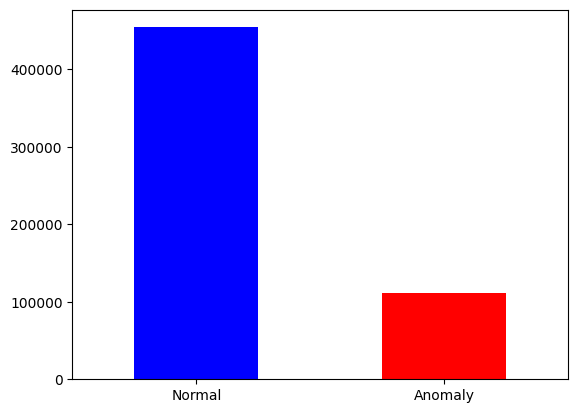

In [21]:
# Map 0 to 'Normal' and 1 to 'Anomaly' for graph
# Rename the index labels
bin_labels_count = bin_labels_count.rename(index={0: 'Normal', 1: 'Anomaly'})
print(bin_labels_count)

bin_labels_count.plot(kind='bar', color=['blue', 'red'])
plt.xticks(rotation=0)          # Unrotate x-axis labels
plt.show()

### Separation of Features and Labels

In [22]:
# Drop target columns to get only features
numeric_features = list(final_df.columns.drop(['Label', 'Label_Binary']))

# Features
X = final_df[numeric_features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565570 entries, 1734278 to 2735215
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination_Port             565570 non-null  int64  
 1   Flow_Duration                565570 non-null  int64  
 2   Total_Fwd_Packets            565570 non-null  int64  
 3   Total_Backward_Packets       565570 non-null  int64  
 4   Total_Length_of_Fwd_Packets  565570 non-null  int64  
 5   Total_Length_of_Bwd_Packets  565570 non-null  int64  
 6   Fwd_Packet_Length_Max        565570 non-null  int64  
 7   Fwd_Packet_Length_Min        565570 non-null  int64  
 8   Fwd_Packet_Length_Mean       565570 non-null  float64
 9   Fwd_Packet_Length_Std        565570 non-null  float64
 10  Bwd_Packet_Length_Max        565570 non-null  int64  
 11  Bwd_Packet_Length_Min        565570 non-null  int64  
 12  Bwd_Packet_Length_Mean       565570 non-null  float

In [23]:
# Binary Labels
y = final_df['Label_Binary'].values

# Model Fitting and Evaluation

In [24]:
# Set seed for reproducibility
SEED = 21

# Instantiate models
unsupervised_ml_models = [Birch(n_clusters = 2),
                          KMeans(n_clusters = 2, random_state = SEED, n_init='auto')]

supervised_ml_models = [DecisionTreeClassifier(random_state = SEED),
                        LogisticRegression(random_state = SEED, max_iter = 300)]

In [25]:
# Split data into 70% training set and 30% test set
# X: features; y: labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

## Unsupervised Machine Learning

In [26]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Lists for evaluation metrics
unsup_model = []
rand_index_list = []
h_score_list = []
s_coef_list = []
dav_b_index_list = []

for model in unsupervised_ml_models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled)
    unsup_labels = model.predict(X_test_scaled)

    # Evaluation with ground truth labels
    rand_index = round(metrics.adjusted_rand_score(y_test, unsup_labels), 3)
    h_score = round(metrics.homogeneity_score(y_test, unsup_labels), 3)

    # Evaluation without ground truth labels
    s_coef = round(metrics.silhouette_score(X_test_scaled, unsup_labels), 3)
    dav_b_index = round(metrics.davies_bouldin_score(X_test_scaled, unsup_labels), 3)

    # Append results to corresponding lists
    unsup_model.append(model_name)
    rand_index_list.append(rand_index)
    h_score_list.append(h_score)
    s_coef_list.append(s_coef)
    dav_b_index_list.append(dav_b_index)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('Rand_Index: {}'.format(rand_index))
    print('Homogeneity: {}'.format(h_score))
    print('Silhouette_Coefficient: {}'.format(s_coef))
    print('Davies_Bouldin_Index: {}'.format(dav_b_index))

    print("==============================================================================")


The Metrics for Birch are: 
Rand_Index: -0.0
Homogeneity: 0.0
Silhouette_Coefficient: 0.986
Davies_Bouldin_Index: 0.338

The Metrics for KMeans are: 
Rand_Index: 0.307
Homogeneity: 0.136
Silhouette_Coefficient: 0.581
Davies_Bouldin_Index: 1.378


### Compilation of Unsupervised ML Results

In [28]:
# Convert lists to a single DataFrame
unsup_dict_of_lists = {
    "Model": unsup_model,
    "Rand_Index": rand_index_list,
    "Homogeneity": h_score_list,
    "Silhouette_Coefficient": s_coef_list,
    "Davies_Bouldin_Index": dav_b_index_list,
}

unsup_results = pd.DataFrame(unsup_dict_of_lists)
unsup_results

,Model,Rand_Index,Homogeneity,Silhouette_Coefficient,Davies_Bouldin_Index
0,Birch,-0.000,0.000,0.986,0.338
1,KMeans,0.307,0.136,0.581,1.378


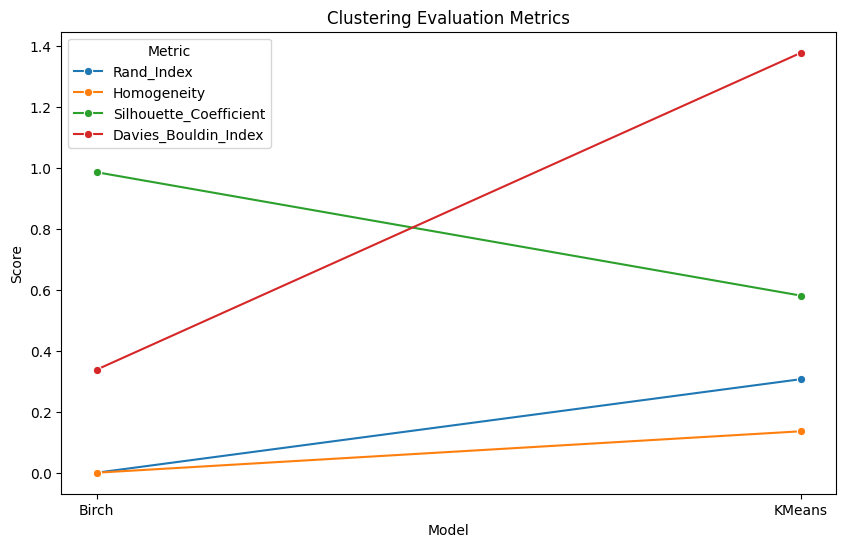

In [29]:
# Show the scores for each clustering metric across the two models
plt.figure(figsize=(10, 6))
sns.lineplot(data=unsup_results.melt('Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric', marker='o')
plt.title('Clustering Evaluation Metrics')
plt.show()

## Supervised Machine Learning


The Metrics for DecisionTreeClassifier are: 
Accuracy: 0.998
Precision: 0.996
TPR: 0.996
TNR: 0.999
F1_Score: 0.996
AUC_ROC: 0.998 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136394
           1       1.00      1.00      1.00     33277

    accuracy                           1.00    169671
   macro avg       1.00      1.00      1.00    169671
weighted avg       1.00      1.00      1.00    169671

[[136256    138]
 [   117  33160]]


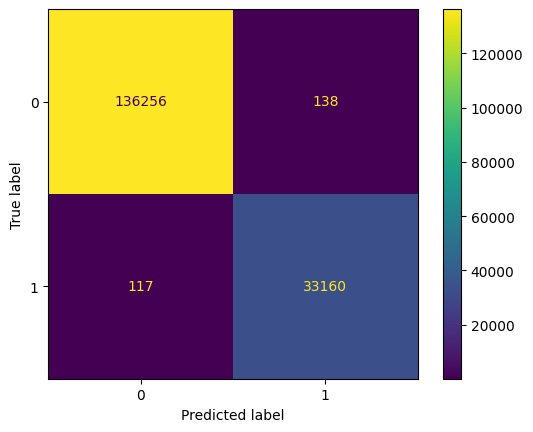

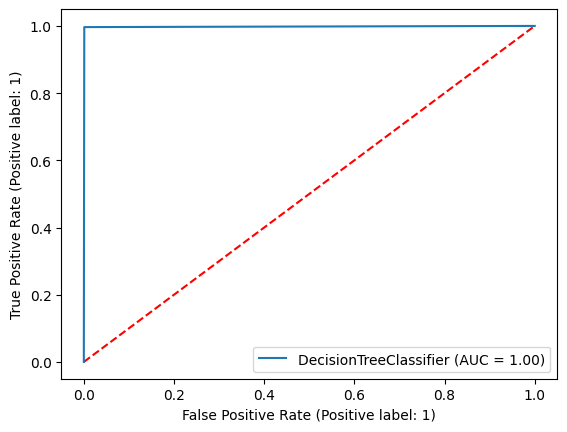


The Metrics for LogisticRegression are: 
Accuracy: 0.878
Precision: 0.748
TPR: 0.571
TNR: 0.953
F1_Score: 0.648
AUC_ROC: 0.762 

              precision    recall  f1-score   support

           0       0.90      0.95      0.93    136394
           1       0.75      0.57      0.65     33277

    accuracy                           0.88    169671
   macro avg       0.82      0.76      0.79    169671
weighted avg       0.87      0.88      0.87    169671

[[129990   6404]
 [ 14274  19003]]


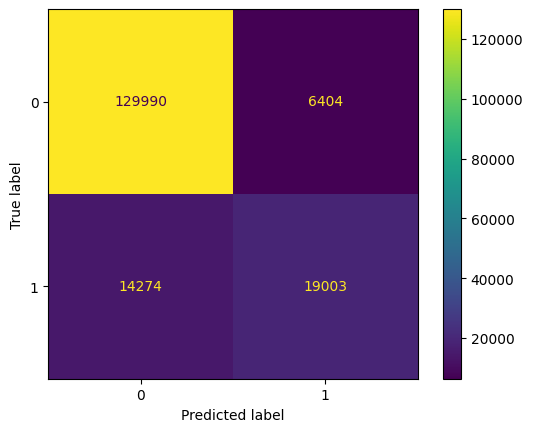

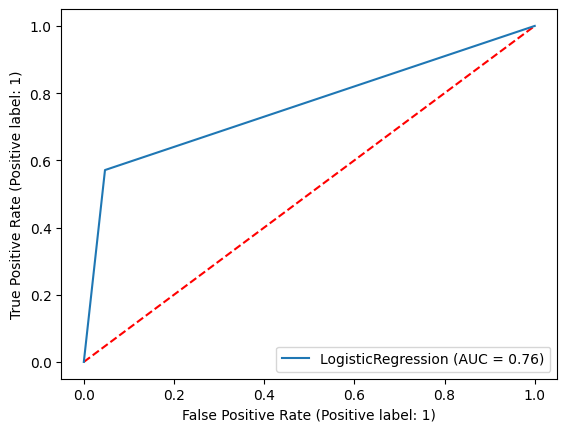

In [30]:
# Lists for supervised evaluation metrics
sup_model = []
sup_accuracy = []
sup_precision = []
sup_tpr = []          # Recall = Sensitivity = TPR
sup_tnr = []          # Specificity = TNR
sup_f1 = []
sup_auc_roc = []

for model in supervised_ml_models:
    model_name = model.__class__.__name__

    model.fit(X_train, y_train)               # train algorithm on the training data
    sup_labels = model.predict(X_test)        # predict labels on the test set

    cm = confusion_matrix(y_test, sup_labels, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = round(metrics.accuracy_score(y_test, sup_labels), 3)
    precision = round(metrics.precision_score(y_test, sup_labels), 3)
    recall = round(metrics.recall_score(y_test, sup_labels), 3)
    specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    f1_score = round(metrics.f1_score(y_test, sup_labels), 3)
    roc_auc = round(roc_auc_score(y_test, sup_labels), 3)

    # Append results to corresponding lists
    sup_model.append(model_name)
    sup_accuracy.append(accuracy)
    sup_precision.append(precision)
    sup_tpr.append(recall)
    sup_tnr.append(specificity)
    sup_f1.append(f1_score)
    sup_auc_roc.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('TPR: {}'.format(recall))
    print('TNR: {}'.format(specificity))
    print('F1_Score: {}'.format(f1_score))
    print('AUC_ROC: {} \n'.format(roc_auc))

    print(classification_report(y_test, sup_labels))
    print(cm)
    cm_display.plot()
    plt.show()

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(y_test, sup_labels, name=str(model_name), ax=ax)
    plt.show()

    print("================================================================================================================")

### Compilation of Supervised ML Results

In [31]:
# Show lists of results

print("Models: ", sup_model)
print("Accuracy: ", sup_accuracy)
print("Precision: ", sup_precision)
print("TPR: ", sup_tpr)
print("TNR: ", sup_tnr)
print("F1_Score: ", sup_f1)
print("AUC_ROC: ", sup_auc_roc)

Models:  ['DecisionTreeClassifier', 'LogisticRegression']
Accuracy:  [0.998, 0.878]
Precision:  [0.996, 0.748]
TPR:  [0.996, 0.571]
TNR:  [0.999, 0.953]
F1_Score:  [0.996, 0.648]
AUC_ROC:  [0.998, 0.762]


In [32]:
# Convert lists to a single DataFrame
sup_dict_of_lists = {
    "Model": sup_model,
    "Accuracy": sup_accuracy,
    "Precision": sup_precision,
    "TPR": sup_tpr,
    "TNR": sup_tnr,
    "F1_Score": sup_f1,
    "AUC_ROC": sup_auc_roc
}

sup_results = pd.DataFrame(sup_dict_of_lists)
sup_results

,Model,Accuracy,Precision,TPR,TNR,F1_Score,AUC_ROC
0,DecisionTreeClassifier,0.998,0.996,0.996,0.999,0.996,0.998
1,LogisticRegression,0.878,0.748,0.571,0.953,0.648,0.762


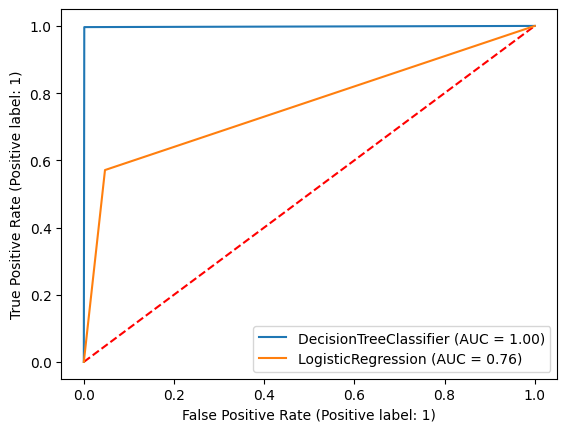

In [33]:
# Show all ROC_AUC curves in one chart

ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for model in supervised_ml_models:
    model_name = model.__class__.__name__

    model.fit(X_train, y_train)
    sup_labels = model.predict(X_test)

    RocCurveDisplay.from_predictions(y_test, sup_labels, name=str(model_name), ax=ax)

plt.show()

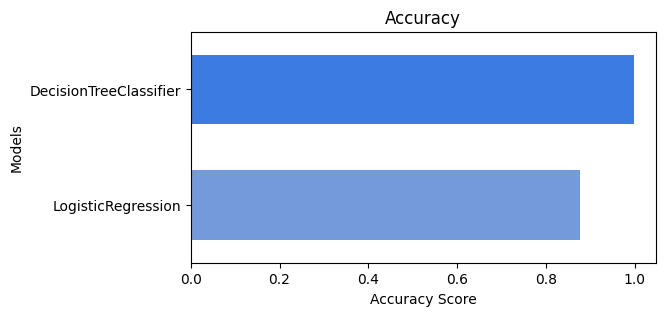

In [34]:
# Display accuracies
custom_palette1 = ["#1F75FE", "#6495ED"]

plt.figure(figsize=(6,3))
sns.barplot(data=sup_results, x='Accuracy', y='Model', width=0.6, palette=custom_palette1)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.show()

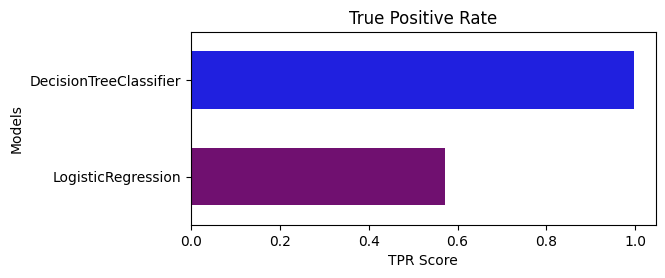

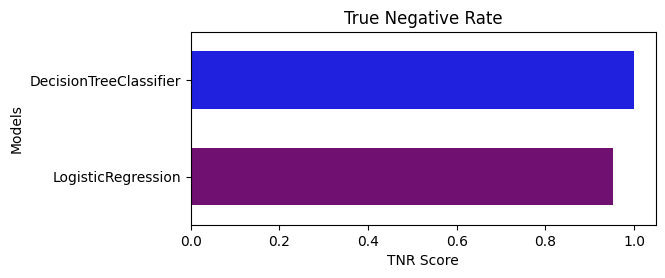

In [35]:
# Show TPR of models
custom_palette2 = ["blue", "purple"]

plt.figure(figsize=(6,2.5))
sns.barplot(data=sup_results, x='TPR', y='Model', width=0.6, palette=custom_palette2)
plt.title("True Positive Rate")
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

# Show TNR of models
plt.figure(figsize=(6,2.5))
sns.barplot(data=sup_results, x='TNR', y='Model', width=0.6, palette=custom_palette2)
plt.title("True Negative Rate")
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.show()